In [2]:
# Import the Pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a reference the CSV file desired
#fbi_path = "Resources/FBI_UCR_V3.csv"

csv_path = "data/ArrestByCounty-PopByCounty.csv"

# Read the CSV into a Pandas DataFrame
#fbi_df = pd.read_csv(fbi_path)

csv_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
#fbi_df.head()

#teller  El Paso

In [4]:
drug_combin = pd.DataFrame(csv_df[((csv_df["County"]=="El Paso") | (csv_df["County"]=="Teller")) & (csv_df["Year"]==2016) & (csv_df["Which"]=="Drug")].sum())
drug_combin 

,0
County,El PasoTellerEl PasoTeller
Year,8064
Crime,Drug ViolationsDrug ViolationsDrug ViolationsD...
Arrests,1320
Age Group,JuvenileJuvenileAdultAdult
Which,DrugDrugDrugDrug
Year group,2015-20192015-20192015-20192015-2019
Rate,26.5246.0820.5523.66


In [5]:
csv_df[(csv_df["County"]=="Teller") & (csv_df["Year"]==2016) & (csv_df["Which"]=="Drug")].sum()

County                          TellerTeller
Year                                    4032
Crime         Drug ViolationsDrug Violations
Arrests                                   56
Age Group                      JuvenileAdult
Which                               DrugDrug
Year group                2015-20192015-2019
Rate                              46.0823.66
dtype: object

In [6]:
csv_df[(csv_df["County"]=="El Paso") & (csv_df["Year"]==2016) & (csv_df["Which"]=="Drug")].head()


,County,Year,Crime,Arrests,Age Group,Which,Year group,Rate
27265,El Paso,2016,Drug Violations,209,Juvenile,Drug,2015-2019,26.52
27823,El Paso,2016,Drug Violations,1055,Adult,Drug,2015-2019,20.55


In [7]:
reduced_df = csv_df[["County","Year","Crime","Arrests","Which","Year group"]]

In [8]:
reduced_df.head()

,County,Year,Crime,Arrests,Which,Year group
0,Adams,1992,Aggravated Assault,1654,Violent,1992-1994
1,Adams,1992,Aggravated Assault,510,Violent,1992-1994
2,Adams,1992,Arson,14,Property,1992-1994
3,Adams,1992,Arson,50,Property,1992-1994
4,Adams,1992,Burglary,304,Property,1992-1994


In [9]:
#county_df = reduced_df.loc[(reduced_df['County']=='Teller') | (reduced_df['County']=='El Paso'),:]

county_df = reduced_df.loc[(reduced_df['County']=='El Paso'),:]

len(county_df)

448

In [10]:
no_null_crime_df = county_df.dropna(how='any')
len(no_null_crime_df)

448

In [11]:
print(no_null_crime_df["Year"].max())
print(no_null_crime_df["Year"].min())

2016
1992


In [12]:
no_null_crime_df.tail()

,County,Year,Crime,Arrests,Which,Year group
27824,El Paso,2016,Forcible Rape,57,Violent,2015-2019
27825,El Paso,2016,Larceny/Theft,2772,Property,2015-2019
27826,El Paso,2016,Motor Vehicle Theft,341,Property,2015-2019
27827,El Paso,2016,Murder/Manslaughter,32,Violent,2015-2019
27828,El Paso,2016,Robbery,96,Violent,2015-2019


In [13]:
no_null_crime_df["Which"].value_counts()

Violent     200
Property    200
Drug         48
Name: Which, dtype: int64

In [14]:
property_df = no_null_crime_df.loc[(no_null_crime_df['Which']=='Property'),:]

property_df["Crime"].unique()

array(['Arson', 'Burglary', 'Larceny/Theft', 'Motor Vehicle Theft'],
      dtype=object)

In [15]:
#print(property_df.head())
#print()
#print(property_df.tail())
#print()
#print(property_df["Arrests"].sum())
print()
property_year = property_df.groupby(['Year']).sum()
print(property_year.tail())


      Arrests
Year         
2012     3127
2013     3359
2014     4694
2015     4511
2016     4052


In [16]:
violent_df = no_null_crime_df.loc[(no_null_crime_df['Which']=='Violent'),:]

violent_df["Crime"].unique()

array(['Aggravated Assault', 'Forcible rape', 'Murder/Manslaughter',
       'Robbery', 'Forcible Rape'], dtype=object)

In [17]:
#print(violent_df.head())
#print()
#print(violent_df.tail())
#print()
#print(violent_df["Arrests"].sum())
violent_year = violent_df.groupby(['Year']).sum()
print(violent_year.tail())

      Arrests
Year         
2012      764
2013      843
2014      941
2015      961
2016     1136


In [18]:
drug_df = no_null_crime_df.loc[(no_null_crime_df['Which']=='Drug'),:]

drug_df["Crime"].unique()

array(['Drug Violations'], dtype=object)

In [19]:
#print(drug_df.head())
#print()
#print(drug_df.tail())
#print()
#print(drug_df["Arrests"].sum())
drug_year = drug_df.groupby(['Year']).sum()
print(drug_year.tail())

      Arrests
Year         
2012     1002
2013      907
2014     1153
2015     1199
2016     1264


Text(0.5, 1.0, 'Property Crimes \n-------------------------------------\n Arson, Burglary, Larceny/Theft, Motor Vehicle Theft')

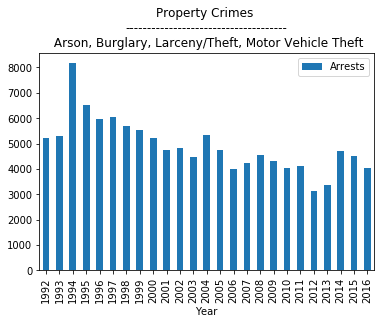

In [20]:
property_year.plot.bar()
plt.title("Property Crimes \n-------------------------------------\n Arson, Burglary, Larceny/Theft, Motor Vehicle Theft")

Text(0.5, 1.0, 'Violent Crimes \n-------------------------------------------------\n Aggravated Assault, Forcible Rape, Murder/Manslaughter, Robbery')

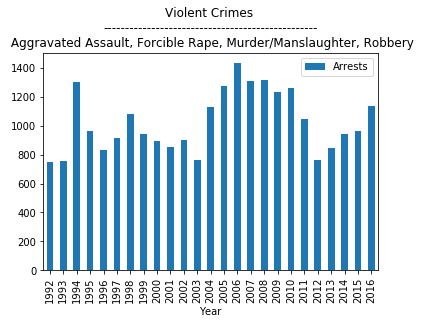

In [21]:
violent_year.plot.bar()
plt.title("Violent Crimes \n-------------------------------------------------\n Aggravated Assault, Forcible Rape, Murder/Manslaughter, Robbery")

Text(0.5, 1.0, 'Drug Crimes \n---------------------\n Drug Violations')

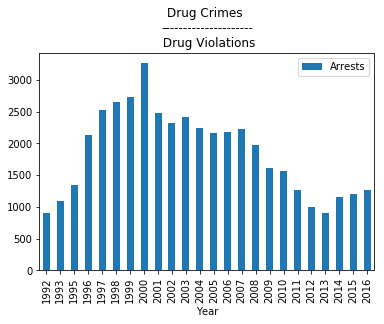

In [22]:
drug_year.plot.bar()
plt.title("Drug Crimes \n---------------------\n Drug Violations")
